# Import Mediapipe & Dollarpy

In [3]:
%pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl (44.8 MB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install dollarpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached dollarpy-0.1.1-py2.py3-none-any.whl (3.7 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [5]:
%pip install cv2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [6]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
from dollarpy import Recognizer, Template, Point
# import csv
import os
import numpy as np
import matplotlib.pyplot as plt



mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [2]:
templates=[] #list of templates for $1 training

# Create Function to Extract Hand landmarks and convert them to POINTS

In [3]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
from dollarpy import Recognizer, Template, Point

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

def getHandLandmarks(videoURL, label):
    cap = cv2.VideoCapture(videoURL)
    
    # Lists to hold hand landmarks
    hand_landmarks = []

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Convert the frame to RGB for MediaPipe
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame to get hand landmarks
        results = hands.process(frame_rgb)

        if results.multi_hand_landmarks:
            for landmarks in results.multi_hand_landmarks:
                for landmark in landmarks.landmark:
                    x, y, z = landmark.x, landmark.y, landmark.z
                    # Add the hand landmark to the list
                    hand_landmarks.append(Point(x, y, z))
                    
        # Display the frame with hand landmarks
        cv2.imshow(label, frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Plot hand landmarks (you can customize this part)
    xs, ys = zip(*[(landmark.x, landmark.y) for landmark in hand_landmarks])
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    plt.gca().invert_yaxis()
    plt.show()

    return hand_landmarks


# Add Template Vides (Classes)

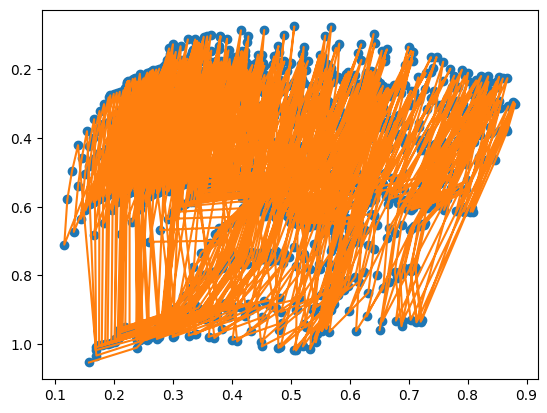

In [4]:
video_path = "E:\Semster 7\HCI\Media\Left.mp4"
points = getHandLandmarks(video_path, "Left")
tmpl_interested = Template('Left', points)
templates.append(tmpl_interested)

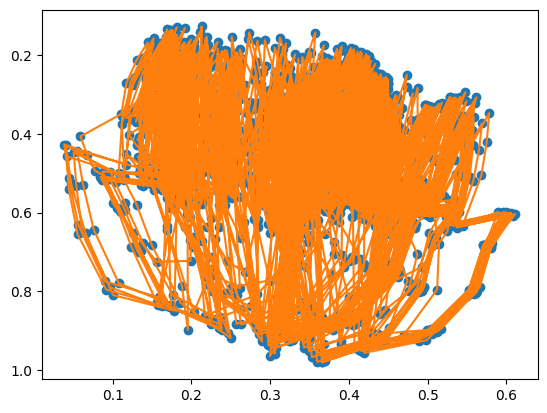

In [6]:
video_path = "E:\Semster 7\HCI\Media\Right.mp4"
points = getHandLandmarks(video_path, "Right")
tmpl_interested = Template('Right', points)
templates.append(tmpl_interested)

# Test With New Video Outside the Tempelate

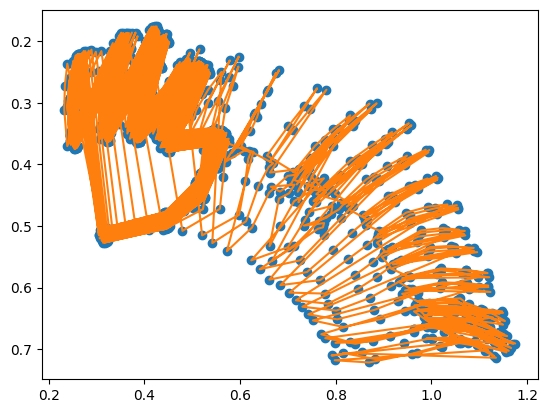

ZeroDivisionError: float division by zero

In [5]:
video_path = "E:\Semster 7\HCI\Media\Trial.mp4"
points = getHandLandmarks(video_path, "Try")
recognizer = Recognizer(templates)
result = recognizer.recognize(points)
print("Gesture Recognized:", result)